Problem 4: How much will my score be? |Preprocessing & Decision Tree


a) Load the dataset.

In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('exam-scores.csv')

# Display the first few rows of the DataFrame to check if the dataset has been loaded correctly
print(df.head())


    f1 f2  f3 f4 f5 f6 target
0  M01  A  20  N  N  Y      +
1  M01  A  20  ?  ?  ?      +
2  M01  A  30  Y  Y  Y      +
3  M01  A  50  N  Y  Y      +
4  M01  A  55  Y  Y  N      +


a) Preprocess the data as necessary (e.g. handle missing values, encoding categorical variables,..).

In [ ]:
# Replace "?" with NaN
df.replace('?', float('nan'), inplace=True)

# Perform one-hot encoding on the 'f1' column
df = pd.get_dummies(df, columns=['f1' , 'f2', 'f4', 'f5', 'f6' ], prefix=['f1' , 'f2', 'f4', 'f5', 'f6'])




print(df.head())

   f3 target  f1_M01  f1_M02  f2_A  f2_B  f2_C  f2_D  f4_N  f4_Y  f5_N  f5_Y  \
0  20      +       1       0     1     0     0     0     1     0     1     0   
1  20      +       1       0     1     0     0     0     0     0     0     0   
2  30      +       1       0     1     0     0     0     0     1     0     1   
3  50      +       1       0     1     0     0     0     1     0     0     1   
4  55      +       1       0     1     0     0     0     0     1     0     1   

   f6_N  f6_Y  
0     0     1  
1     0     0  
2     0     1  
3     0     1  
4     1     0  


b) Split the data into training and test sets. Which of the methods presented in the class is better for division?

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (52, 13)
Test set shape: (13, 13)


c) Initialize a decision tree classifier object with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier object with default parameters
clf = DecisionTreeClassifier()

d) Fit the classifier to the training data.

In [ ]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

e) Evaluate the performance of the model on the test data, using metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='+')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='+')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='+')

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.77
Precision: 0.91
Recall: 0.83
F1 Score: 0.87


f) Visualize the decision tree using a library such as Graphviz or scikit-learn's plot_tree function.

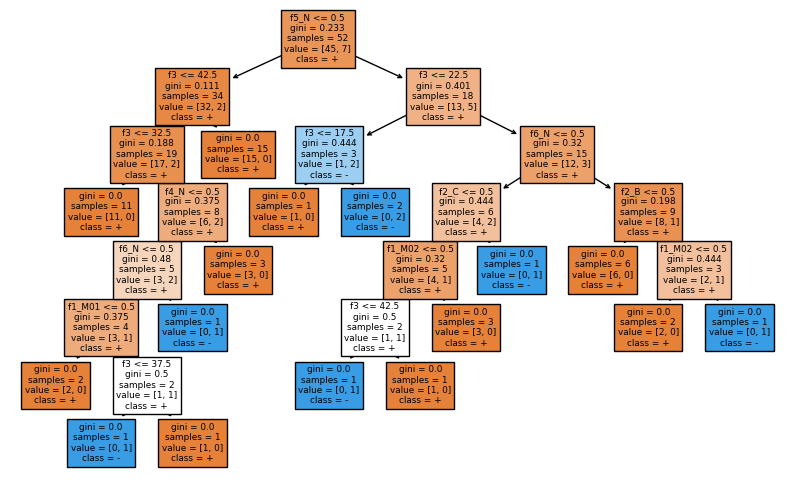

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()


g) Experiment with different hyperparameters of the decision tree (e.g. max_depth, min_samples_split) to see if you can improve the performance of the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the performance of the model on the test data
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='+')
recall = recall_score(y_test, y_pred, pos_label='+')
f1 = f1_score(y_test, y_pred, pos_label='+')

# Print the evaluation metrics
print("Best Hyperparameters: ", best_params)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 10}
Accuracy: 0.85
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


h) Use grid search to find the best hyperparameters for the decision tree.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Split the data into X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:")
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_split: ", grid_search.best_params_['min_samples_split'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])




Best Hyperparameters:
max_depth:  None
min_samples_split:  10
min_samples_leaf:  1


i) Evaluate the performance of the best decision tree on the test data. Can the decision tree determine the pass or fail status?

In [ ]:
# Evaluate the performance of the model with the best hyperparameters on the test data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='+')
recall = recall_score(y_test, y_pred, pos_label='+')
f1 = f1_score(y_test, y_pred, pos_label='+')

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.85
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
